In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 143MB/s] 


In [ ]:
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


For the Purchase column, here’s a focused look at the descriptive statistics, specifically analyzing the difference between the mean and median:

Descriptive Statistics for Purchase Column
Mean: 9,263.97
Median (50%): 8,047.0
Difference: Mean is higher than the median by 1,216.97
Interpretation
The higher mean relative to the median indicates a right-skewed distribution. In this context:

Right Skew: A right-skewed distribution suggests that while most customers have purchase amounts clustered around the median (around 8,047), there are some significantly higher purchase amounts that raise the mean. These higher values are likely due to a smaller subset of customers making large purchases.

Impact on Analysis: This skewness suggests that the mean might overestimate typical spending for the average customer. For business analysis, median could be a more representative measure of typical customer spending since it isn’t as influenced by high outliers.

Business Insight
For Walmart, this means that while targeting high-spending customers could increase revenue, the majority of customers are likely making moderate-sized purchases. This insight might help in designing tiered marketing strategies that cater to both average and high spenders.

# Data Cleaning and Data Imputation

In [ ]:
# Loop through each column and print the count of NaN values\

for col in df.columns:
  nan_count=df[col].isna().sum()
  print("Column ",col," has ",nan_count," NaN values and NAN% is ",nan_count/len(df[col]*100))


Column  User_ID  has  0  NaN values and NAN% is  0.0
Column  Product_ID  has  0  NaN values and NAN% is  0.0
Column  Gender  has  0  NaN values and NAN% is  0.0
Column  Age  has  0  NaN values and NAN% is  0.0
Column  Occupation  has  0  NaN values and NAN% is  0.0
Column  City_Category  has  0  NaN values and NAN% is  0.0
Column  Stay_In_Current_City_Years  has  0  NaN values and NAN% is  0.0
Column  Marital_Status  has  0  NaN values and NAN% is  0.0
Column  Product_Category  has  0  NaN values and NAN% is  0.0
Column  Purchase  has  0  NaN values and NAN% is  0.0


Since we dont have NULL values in any of the given columns in the dataset, hence no need to do data imputation.

# Checking outliers via boxplots

Text(0.5, 0, 'Purchase Amount')

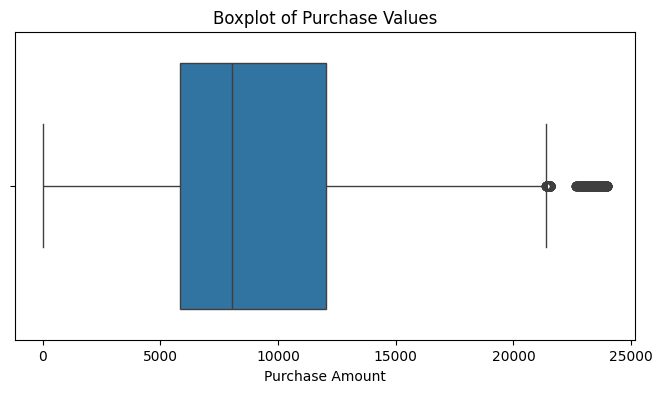

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='Purchase')
plt.title('Boxplot of Purchase Values')
plt.xlabel('Purchase Amount')

Retain Outliers for initial analysis, as they could help reveal interesting spending patterns across demographics.

# Exploratory Data Analysis (EDA)

## Univariate analysis

Continuous Variables: Histograms, Count Plots, and Distplots

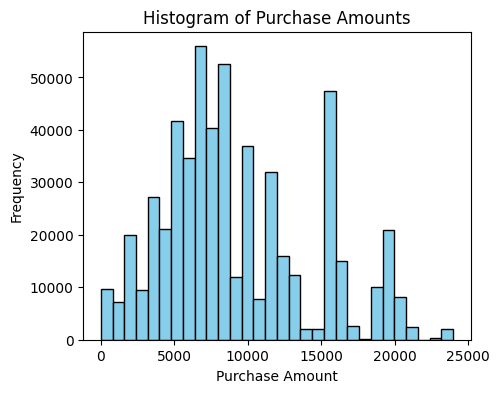

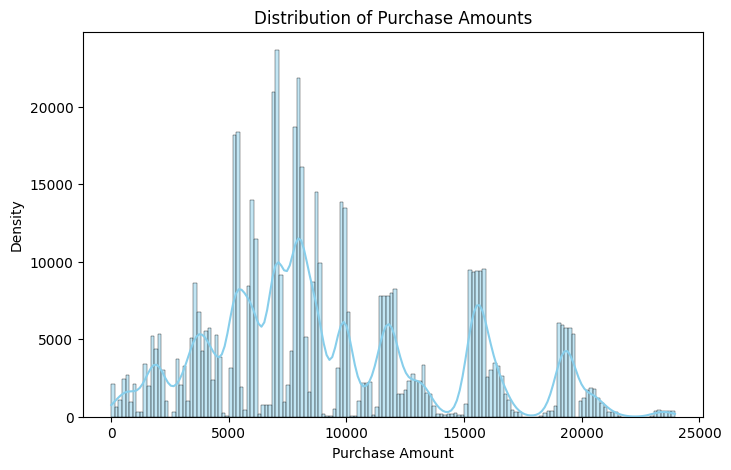

In [ ]:
# Histogram for the Purchase column
plt.figure(figsize=(5, 4))
plt.hist(df['Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution plot (distplot) for Purchase
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase'], kde=True, color='skyblue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()

Categorical Variables: Bar Plots

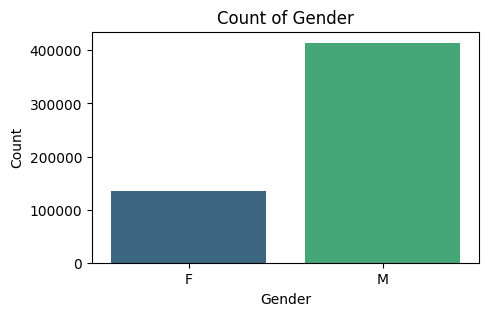

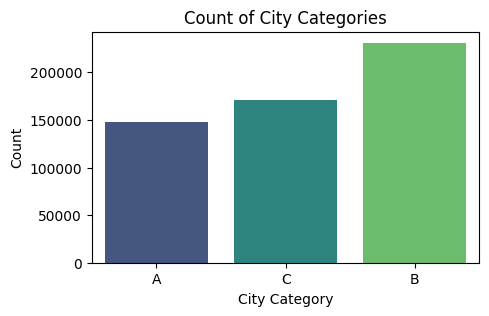

In [ ]:
# Bar plot for Gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for City_Category
plt.figure(figsize=(5, 3))
sns.countplot(x='City_Category', data=df, palette='viridis')
plt.title('Count of City Categories')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

Boxplots for Purchase by Gender, Marital_Status, and Age Bins


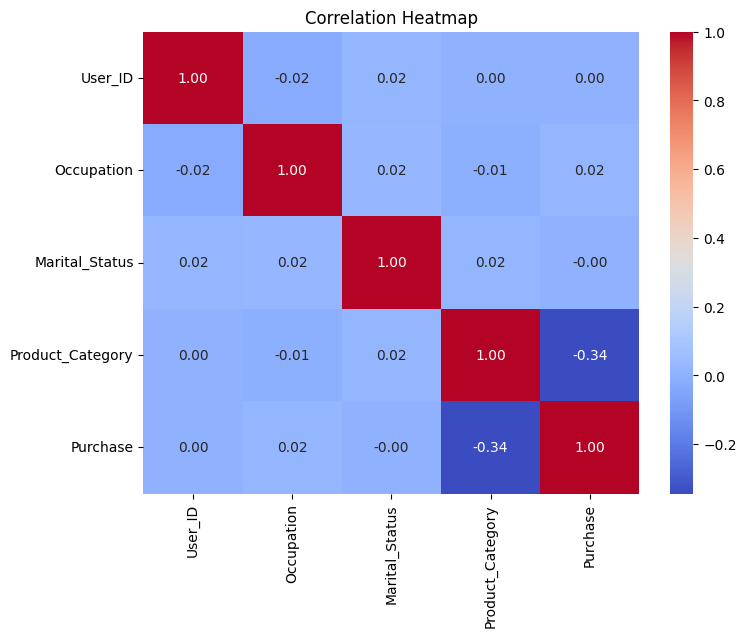

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Generate the heatmap for correlations between numeric columns only
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Data Exploration

In [ ]:
#Separate male and female customers in the data.
female_customers=df[df['Gender']=='F']
male_customers=df[df['Gender']=='M']

#Calculate the Total and Average Purchase gender wise
avg_female_purchase=female_customers['Purchase'].mean()
avg_male_purchase=male_customers['Purchase'].mean()

total_female_purchase=female_customers['Purchase'].sum()
total_male_purchase=male_customers['Purchase'].sum()

print("Average Purchase by Female Customers:", avg_female_purchase)
print("Average Purchase by Male Customers:", avg_male_purchase)
print("Total Purchase by Female Customers:", total_female_purchase)
print("Total Purchase by Male Customers:", total_male_purchase)

if(avg_female_purchase>=avg_male_purchase):
  print("On an avg Female purchase more than Male as per walmart dataset")
else:
  print("On an avg Male purchase more than Female as per walmart dataset")

if(total_female_purchase>=total_male_purchase):
  print("Total Female purchase value is more than Male purchase value as per walmart dataset")
else:
  print("Total Male purchase value is more than Total Female purchase value as per walmart dataset")


Average Purchase by Female Customers: 8734.565765155476
Average Purchase by Male Customers: 9437.526040472265
Total Purchase by Female Customers: 1186232642
Total Purchase by Male Customers: 3909580100
On an avg Male purchase more than Female as per walmart dataset
Total Male purchase value is more than Total Female purchase value as per walmart dataset


# Confidence Interval and CLT Analysis

In [ ]:
std_dev=df['Purchase'].std()
print("Population std deviation is ",std_dev)

Population std deviation is  5023.065393820627


##Gender-Based Analysis

Calculate Confidence interval over entire population (dataset)

CI calculation using male and female samples respectively

In [ ]:
# CI using female sample

#(95% confidence interval)
print("90% confidence interval is ",norm.interval(confidence=0.90,loc=avg_female_purchase,scale=std_dev/len(female_customers)))

#(95% confidence interval)
print("95% confidence interval is ",norm.interval(confidence=0.95,loc=avg_female_purchase,scale=std_dev/len(female_customers)))

#(99% confidence interval)
print("99% confidence interval is ",norm.interval(confidence=0.99,loc=avg_female_purchase,scale=std_dev/len(female_customers)))




90% confidence interval is  (8734.50492819083, 8734.62660212012)
95% confidence interval is  (8734.493273440907, 8734.638256870045)
99% confidence interval is  (8734.470494893305, 8734.661035417646)


In [ ]:
# CI using male sample

#(95% confidence interval)
print("90% confidence interval is ",norm.interval(confidence=0.90,loc=avg_male_purchase,scale=std_dev/len(male_customers)))

#(95% confidence interval)
print("95% confidence interval is ",norm.interval(confidence=0.95,loc=avg_male_purchase,scale=std_dev/len(male_customers)))

#(99% confidence interval)
print("99% confidence interval is ",norm.interval(confidence=0.99,loc=avg_male_purchase,scale=std_dev/len(male_customers)))


90% confidence interval is  (9437.50609592711, 9437.54598501742)
95% confidence interval is  (9437.502275080895, 9437.549805863635)
99% confidence interval is  (9437.494807453706, 9437.557273490824)


## Marital status based analysis

In [ ]:
#Separate married and unmarried customers in the data.
married_customers=df[df['Marital_Status']==1]
unmarried_customers=df[df['Marital_Status']==0]

#Calculate the Average Purchase marital status wise
avg_married_purchase=married_customers['Purchase'].mean()
avg_unmarried_purchase=unmarried_customers['Purchase'].mean()

print("Average Purchase by married Customers:", avg_married_purchase)
print("Average Purchase by unmarried Customers:", avg_unmarried_purchase)

CI calculation using married and unmarried samples respectively

In [ ]:
# CI using married sample

#(95% confidence interval)
print("90% confidence interval is ",norm.interval(confidence=0.90,loc=avg_married_purchase,scale=std_dev/len(married_customers)))

#(95% confidence interval)
print("95% confidence interval is ",norm.interval(confidence=0.95,loc=avg_married_purchase,scale=std_dev/len(married_customers)))

#(99% confidence interval)
print("99% confidence interval is ",norm.interval(confidence=0.99,loc=avg_married_purchase,scale=std_dev/len(married_customers)))



90% confidence interval is  (9261.137908078426, 9261.21124008632)
95% confidence interval is  (9261.130883843913, 9261.218264320834)
99% confidence interval is  (9261.117155376014, 9261.231992788733)


In [ ]:
# CI using unmarried sample

#(95% confidence interval)
print("90% confidence interval is ",norm.interval(confidence=0.90,loc=avg_unmarried_purchase,scale=std_dev/len(unmarried_customers)))

#(95% confidence interval)
print("95% confidence interval is ",norm.interval(confidence=0.95,loc=avg_unmarried_purchase,scale=std_dev/len(unmarried_customers)))

#(99% confidence interval)
print("99% confidence interval is ",norm.interval(confidence=0.99,loc=avg_unmarried_purchase,scale=std_dev/len(unmarried_customers)))


90% confidence interval is  (9265.882175685932, 9265.93306215708)
95% confidence interval is  (9265.877301436376, 9265.937936406637)
99% confidence interval is  (9265.867774992115, 9265.947462850898)


## Age based Analysis

mapping for life stages:
A1 : 0-17
A2 : 18-25
A3 : 26-35
A4 : 36-45
A5 : 46-50
A6 : 51-55
A7 : 55+

In [ ]:
#Separate married and unmarried customers in the data.
A1_customers=df[df['Age']=='0-17']
A2_customers=df[df['Age']=='18-25']
A3_customers=df[df['Age']=='26-35']
A4_customers=df[df['Age']=='36-45']
A5_customers=df[df['Age']=='46-50']
A6_customers=df[df['Age']=='51-55']
A7_customers=df[df['Age']=='55+']

#Calculate the Average Purchase age status wise
avg_A1_purchase=A1_customers['Purchase'].mean()
avg_A2_purchase=A2_customers['Purchase'].mean()
avg_A3_purchase=A3_customers['Purchase'].mean()
avg_A4_purchase=A4_customers['Purchase'].mean()
avg_A5_purchase=A5_customers['Purchase'].mean()
avg_A6_purchase=A6_customers['Purchase'].mean()
avg_A7_purchase=A7_customers['Purchase'].mean()


print("Average Purchase by A1 Customers:", avg_A1_purchase)
print("Average Purchase by A2 Customers:", avg_A2_purchase)
print("Average Purchase by A3 Customers:", avg_A3_purchase)
print("Average Purchase by A4 Customers:", avg_A4_purchase)
print("Average Purchase by A5 Customers:", avg_A5_purchase)
print("Average Purchase by A6 Customers:", avg_A6_purchase)
print("Average Purchase by A7 Customers:", avg_A7_purchase)

Average Purchase by A1 Customers: 8933.464640444974
Average Purchase by A2 Customers: 9169.663606261289
Average Purchase by A3 Customers: 9252.690632869888
Average Purchase by A4 Customers: 9331.350694917874
Average Purchase by A5 Customers: 9208.625697468327
Average Purchase by A6 Customers: 9534.808030960236
Average Purchase by A7 Customers: 9336.280459449405


In [ ]:
# Calculate 95% Confidence intervals for all age bins

print("95% confidence interval for A1 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A1_customers)))
print("95% confidence interval for A2 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A2_customers)))
print("95% confidence interval for A3 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A3_customers)))
print("95% confidence interval for A4 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A4_customers)))
print("95% confidence interval for A5 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A5_customers)))
print("95% confidence interval for A6 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A6_customers)))
print("95% confidence interval for A7 is ",norm.interval(confidence=0.95,loc=avg_A1_purchase,scale=std_dev/len(A7_customers)))


95% confidence interval for A1 is  (8932.812738229117, 8934.116542660831)
95% confidence interval for A2 is  (8933.36585429944, 8933.563426590508)
95% confidence interval for A3 is  (8933.419806154858, 8933.50947473509)
95% confidence interval for A4 is  (8933.375150773172, 8933.554130116776)
95% confidence interval for A5 is  (8933.24921786639, 8933.680063023558)
95% confidence interval for A6 is  (8933.208932092883, 8933.720348797066)
95% confidence interval for A7 is  (8933.006817376527, 8933.922463513421)


## CI using Bootstrapping (Experiment with Sample Sizes)

Lets test for sample sizes 100,1000,10000 respectively

In [ ]:
survey=df['Purchase']

def bootstrapp_func(sample_size):
  bootstrapped_mean_survey=[]
  for i in range(sample_size):
    bootstrapped_sample=np.random.choice(survey,size=100)
    bootstrapped_mean=np.mean(bootstrapped_sample)
    bootstrapped_mean_survey.append(bootstrapped_mean)
  sns.histplot(bootstrapped_mean_survey,kde=True)
  #Now we need to calculate 95% CI
  x1=np.percentile(bootstrapped_mean_survey,2.5)
  x2=np.percentile(bootstrapped_mean_survey,97.5)
  print("95% Confidence interval for sample size ",sample_size," is ",x1," - ",x2)

95% Confidence interval for sample size  100  is  8156.87775  -  10170.779


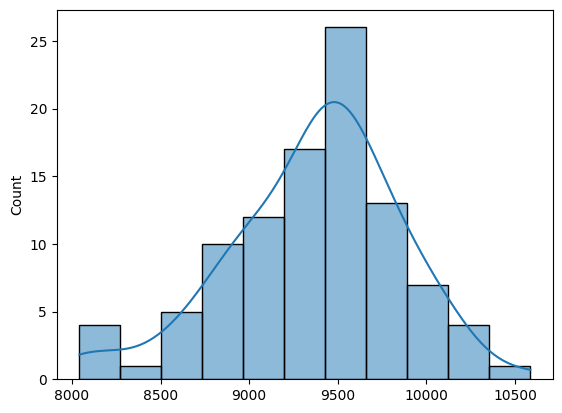

In [ ]:
#CI for sample size 100

bootstrapp_func(100)

95% Confidence interval for sample size  1000  is  8331.67425  -  10235.983


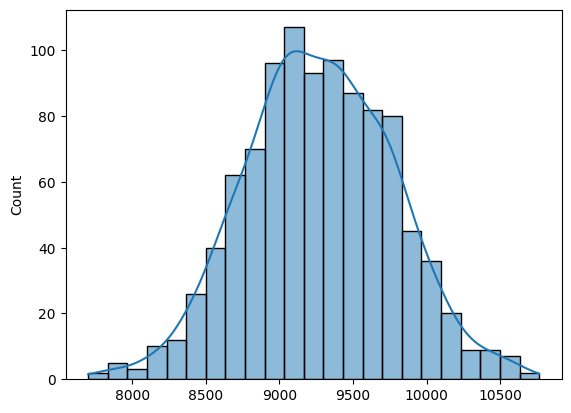

In [ ]:
#CI for sample size 1000

bootstrapp_func(1000)

95% Confidence interval for sample size  10000  is  8291.038  -  10254.26175


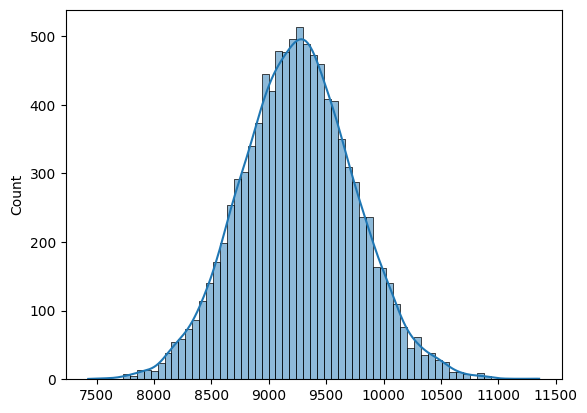

In [ ]:
#CI for sample size 10000

bootstrapp_func(10000)

Using histplots we can see as and when we increasw sample size , plot comes more closer to normal distribution.